In [1]:
%%capture

# installs
!python3.11 -m pip install numpy
!python3.11 -m pip install scipy
!python3.11 -m pip install matplotlib

In [2]:
import numpy as np

In [3]:
loaded = np.load("./endeavour.npz")
task1 = loaded["task1"]
task2 = loaded["task2"]
task3 = loaded["task3"]
task4 = loaded["task4"]
task6a = loaded["task6a"]
task6b = loaded["task6b"]
task7a = loaded["task7a"]
task7b = loaded["task7b"]

In [4]:
import matplotlib.pyplot as plt

# Task 1


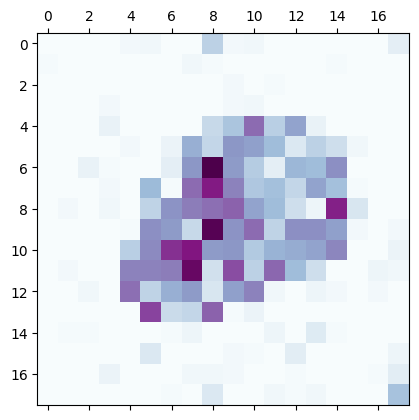

In [5]:
# reference pattern
plt.matshow(task1[0], cmap="BuPu")

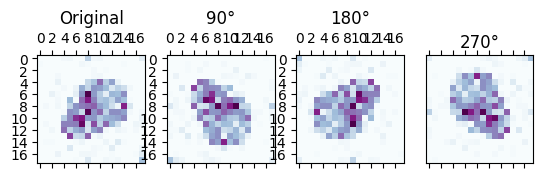

In [6]:
task_1_fig_1, axis = plt.subplots(1, 4)

plt.tick_params(
    left=False, right=False, labelleft=False, labelbottom=False, bottom=False
)

axis[0].matshow(task1[0], cmap="BuPu")
axis[0].set_title("Original")
axis[1].matshow(np.rot90(task1[0], -1), cmap="BuPu")
axis[1].set_title("90°")
axis[2].matshow(np.rot90(task1[0], -2), cmap="BuPu")
axis[2].set_title("180°")
axis[3].matshow(np.rot90(task1[0], -3), cmap="BuPu")
axis[3].set_title("270°")

plt.show()

In [7]:
task_1_original = task1[0]
task_1_90 = np.rot90(task1[0], -1)
task_1_180 = np.rot90(task1[0], -2)
task_1_270 = np.rot90(task1[0], -3)

task_1_counts = [0, 0, 0, 0]

for i in task1:
    if np.array_equal(i, task_1_90):
        task_1_counts[1] += 1
    elif np.array_equal(i, task_1_180):
        task_1_counts[2] += 1
    elif np.array_equal(i, task_1_270):
        task_1_counts[3] += 1
    else:
        task_1_counts[0] += 1

task_1_counts

[6, 10, 6, 3]

# Task 2


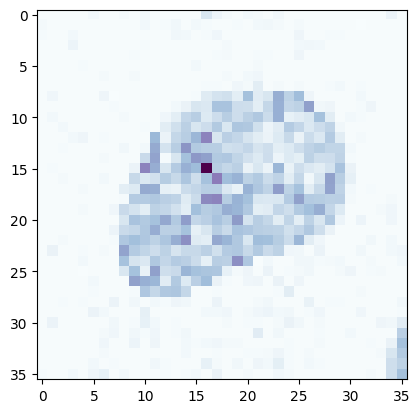

In [8]:
task_2_original_img = np.reshape(task2[0], (36, 36))
plt.imshow(task_2_original_img, cmap="BuPu")

In [9]:
def reshape_img(img):
    return np.reshape(img, (36, 36))

In [10]:
task_2_original = task2[0]
task_2_90 = np.rot90(reshape_img(task2[0]), -1).flatten()
task_2_180 = np.rot90(reshape_img(task2[0]), -2).flatten()
task_2_270 = np.rot90(reshape_img(task2[0]), -3).flatten()

task_2_counts = [0, 0, 0, 0]

for i in task2:
    if np.array_equal(i, task_2_90):
        task_2_counts[1] += 1
    elif np.array_equal(i, task_2_180):
        task_2_counts[2] += 1
    elif np.array_equal(i, task_2_270):
        task_2_counts[3] += 1
    else:
        task_2_counts[0] += 1

task_2_counts

[22, 32, 21, 25]

# Task 3


In [11]:
np.shape(task3[0])  # = 33 ** 2

(1089,)

In [12]:
task_3_original_image = np.reshape(task3[0], (33, 33))

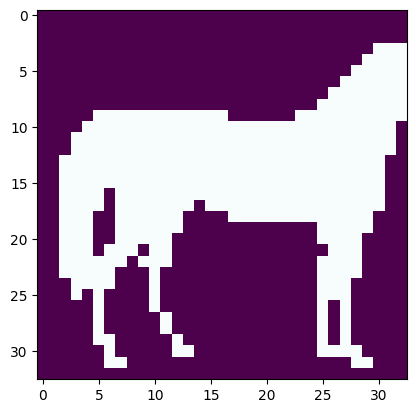

In [13]:
plt.imshow(task_3_original_image, cmap="BuPu")

In [14]:
# This problem can probably be solved by repeating what we did earlier - even if the hint says to use KMeans

task_3_original = task3[0]
task_3_90 = np.rot90(task_3_original_image, -1).flatten()
task_3_180 = np.rot90(task_3_original_image, -2).flatten()
task_3_270 = np.rot90(task_3_original_image, -3).flatten()

In [15]:
task_3_counts = [0, 0, 0, 0]
task_3_sorting = [[], [], [], []]

for i in task3:
    if np.array_equal(i, task_3_90):
        task_3_counts[1] += 1
        task_3_sorting[1].append(i)
    elif np.array_equal(i, task_3_180):
        task_3_counts[2] += 1
        task_3_sorting[2].append(i)
    elif np.array_equal(i, task_3_270):
        task_3_counts[3] += 1
        task_3_sorting[3].append(i)
    else:
        task_3_counts[0] += 1
        task_3_sorting[0].append(i)

task_3_counts

[254, 236, 250, 260]

In [16]:
task_3_sorted = np.array(
    task_3_sorting[0] + task_3_sorting[1] + task_3_sorting[2] + task_3_sorting[3]
)

task_3_sorted

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint16)

Text(0.5, 1.0, 'Sorted')

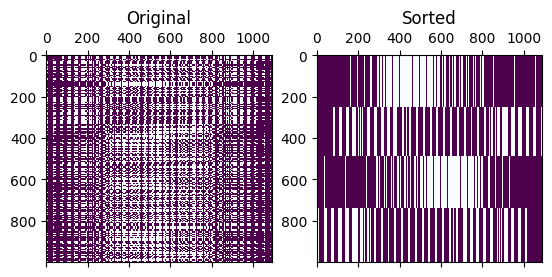

In [17]:
# Plot the design matrices

task_3_subplot, task_3_axes = plt.subplots(1, 2)

task_3_axes[0].matshow(task3, cmap="BuPu")
task_3_axes[0].set_title("Original")
task_3_axes[1].matshow(task_3_sorted, cmap="BuPu")
task_3_axes[1].set_title("Sorted")

# Task 4


In [18]:
task_4_row_sums = np.empty(1)

for i in task4:
    task_4_row_sums = np.append(task_4_row_sums, np.sum(i))

task_4_row_sums = task_4_row_sums[1:]

np.average(task_4_row_sums)

1251.047

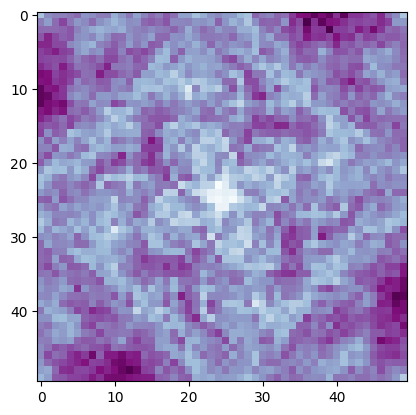

In [19]:
task_4_average_assuming = np.sum(task4, axis=0) / task4.shape[0]

plt.imshow(np.reshape(task_4_average_assuming, (50, 50)), cmap="BuPu")

Setting up K-Means


In [20]:
from sklearn.cluster import KMeans

# 4 directions, so 4 expected clusters
kmeans = KMeans(n_clusters=4, n_init=20, init="k-means++")
output_labels = kmeans.fit_predict(task4)

In [21]:
task_4_sorting = [[], [], [], []]

for i in range(task4.shape[0]):
    task_4_sorting[output_labels[i]].append(task4[i])

In [22]:
task_4_orientations = []
for i in range(4):
    task_4_orientations.append(np.array(task_4_sorting[i]))

task_4_orientations[3].shape

(250, 2500)

In [23]:
def average_img(imgs: np.ndarray) -> np.ndarray:
    return np.sum(imgs, axis=0) / imgs.shape[0]

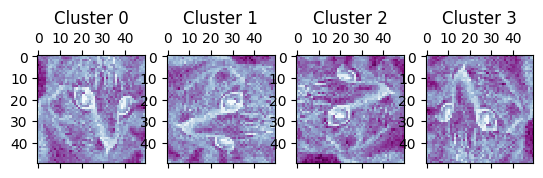

In [24]:
task_4_subplot, task_4_axes = plt.subplots(1, 4)

for i in range(4):
    task_4_axes[i].matshow(
        np.reshape(average_img(task_4_orientations[i]), (50, 50)), cmap="BuPu"
    )
    task_4_axes[i].set_title(f"Cluster {i}")

# Task 5

No code.


# Task 6


In [25]:
task6a.shape, task6b.shape

((1556153,), (1556153,))

In [26]:
task6a, task6b

(array([    0,     0,     0, ..., 65534, 65534, 65534], dtype=uint16),
 array([ 13,  61,  66, ..., 551, 582, 587], dtype=uint16))

In [27]:
# Count of task 6a (or 6b) is the number of ones.
task_6_avg_row_sum = task6a.shape[0] / 65535

task_6_avg_row_sum

23.745372701609828

In [28]:
task_6_matrix = np.empty((65535, 625))

for i in range(task6a.shape[0]):
    task_6_matrix[task6a[i]][task6b[i]] = 1

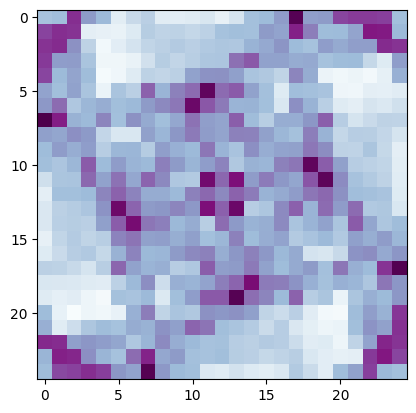

In [29]:
plt.imshow(np.reshape(average_img(task_6_matrix), (25, 25)), cmap="BuPu")

In [30]:
task_6_output_labels = kmeans.fit_predict(task_6_matrix)

In [31]:
task_6_sorting = [[], [], [], []]

for i in range(task_6_matrix.shape[0]):
    task_6_sorting[task_6_output_labels[i]].append(task_6_matrix[i])

task_6_orientations = []
for i in range(4):
    task_6_orientations.append(np.array(task_6_sorting[i]))

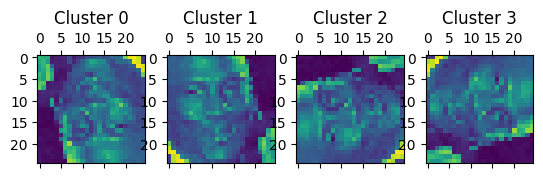

In [32]:
task_6_subplot, task_6_axes = plt.subplots(1, 4)

for i in range(4):
    task_6_axes[i].matshow(np.reshape(average_img(task_6_orientations[i]), (25, 25)))
    task_6_axes[i].set_title(f"Cluster {i}")

# Task 7


In [33]:
task_7_matrix = np.empty((100_000, 625))

for i in range(task7a.shape[0]):
    task_7_matrix[task7a[i]][task7b[i]] = 1

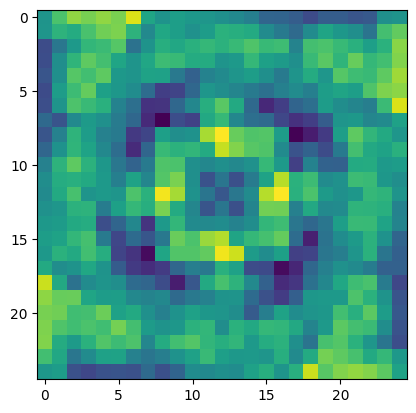

In [34]:
plt.imshow(np.reshape(average_img(task_7_matrix), (25, 25)))

### Things with standard deviation


In [35]:
# find mean pixel value of the "average" unrotated image

task_7_averages = average_img(task_7_matrix)
task_7_mean_row_col = np.mean(task_7_averages)
task_7_std_dev = np.std(task_7_averages)

In [36]:
def count_pixels_within_n_deviations(
    matrix: np.ndarray, n, mean: float, std_dev: float
) -> int:
    count = 0
    for i in matrix:
        if np.abs(np.mean(i) - mean) < n * std_dev:
            count += 1
    return count

In [37]:
(
    count_pixels_within_n_deviations(
        task_7_averages, 1, task_7_mean_row_col, task_7_std_dev
    )
    / task_7_averages.shape[0],
    count_pixels_within_n_deviations(
        task_7_averages, 2, task_7_mean_row_col, task_7_std_dev
    )
    / task_7_averages.shape[0],
)

(0.6752, 0.952)

In [38]:
from sklearn import decomposition

In [39]:
pca = decomposition.PCA(n_components=25)

In [40]:
task_7_pca = pca.fit_transform(task_7_matrix)

In [41]:
kmeans_7 = KMeans(n_clusters=4, n_init=50, init="k-means++")

task_7_output_labels = kmeans_7.fit_predict(task_7_pca)

In [42]:
def sort_to_clusters(matrix: np.ndarray, labels: np.ndarray) -> list:
    sorting = [[], [], [], []]

    for i in range(matrix.shape[0]):
        sorting[labels[i]].append(matrix[i])

    orientations = []
    for i in range(4):
        orientations.append(np.array(sorting[i]))

    return orientations

In [43]:
task_7_orientations = sort_to_clusters(task_7_matrix, task_7_output_labels)

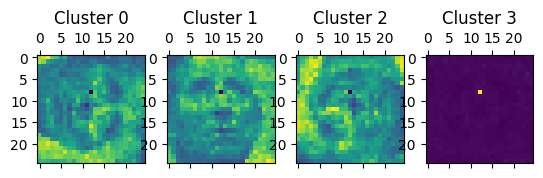

In [44]:
task_7_subplot, task_7_axes = plt.subplots(1, 4)

for i in range(4):
    task_7_axes[i].matshow(np.reshape(average_img(task_7_orientations[i]), (25, 25)))
    task_7_axes[i].set_title(f"Cluster {i}")

In [45]:
def combine_clusters(reference: np.ndarray, clusters: np.ndarray) -> np.ndarray:
    rotated_orientations = []
    for i in range(4):
        lowest_dist = None
        rot = average_img(clusters[i]).reshape(25, 25)
        for j in range(4):
            rot = np.rot90(rot, -1)
            dist = np.linalg.norm(reference - rot)
            if lowest_dist == None or dist < lowest_dist:
                lowest_dist = dist
                best_rot = rot

        rotated_orientations.append(best_rot)
        final = np.array(rotated_orientations).sum(axis=0) / 4

        return final

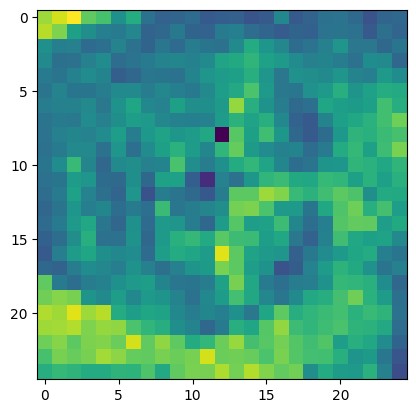

In [46]:
task_7_final_image = combine_clusters(
    np.reshape(average_img(task_7_orientations[0]), (25, 25)), task_7_orientations
)

plt.imshow(np.rot90(task_7_final_image, 0))

In [64]:
# from sklearn.metrics import silhouette_score

# silhouette_score(task_7_pca, task_7_output_labels, n_jobs=-1)

# This takes a minute to execute. Result is 0.033, which essentially means that the clusters are poorly separated. This makes it challenging for the following algorithms.

0.03304348519847442

In [48]:
# try factor analysis

fa = decomposition.FactorAnalysis(n_components=4)

task_7_fa = fa.fit_transform(task_7_matrix)

task_7_fa_labels = kmeans_7.fit_predict(task_7_fa)

task_7_fa_orientations = sort_to_clusters(task_7_matrix, task_7_fa_labels)

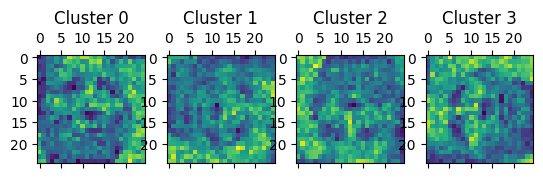

In [49]:
task_7_subplot, task_7_axes = plt.subplots(1, 4)

for i in range(4):
    task_7_axes[i].matshow(np.reshape(average_img(task_7_fa_orientations[i]), (25, 25)))
    task_7_axes[i].set_title(f"Cluster {i}")

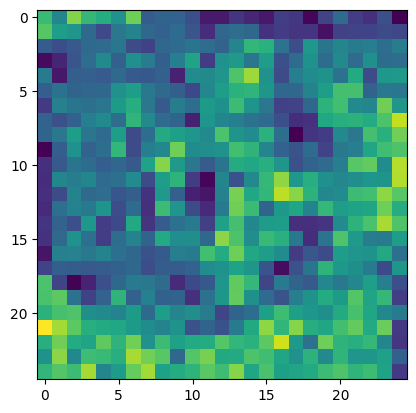

In [50]:
task_7_fa_final_image = combine_clusters(
    np.reshape(average_img(task_7_fa_orientations[0]), (25, 25)), task_7_fa_orientations
)

plt.imshow(np.rot90(task_7_fa_final_image, 3))

Below is code for spectral clustering. After executing for 90 minutes, we decided to move on to the next option.


In [51]:
# try spectral clustering
# from sklearn.cluster import SpectralClustering

# spec_clustering = SpectralClustering(n_clusters=4, affinity="nearest_neighbors")

# task_7_sc_labels = spec_clustering.fit_predict(task_7_matrix)

# task_7_sc_orientations = sort_to_clusters(task_7_matrix, task_7_sc_labels)

In [52]:
# task_7_subplot, task_7_axes = plt.subplots(1, 4)

# for i in range(4):
#     task_7_axes[i].matshow(np.reshape(average_img(task_7_sc_orientations[i]), (25, 25)))
#     task_7_axes[i].set_title(f"Cluster {i}")

In [53]:
# task_7_sc_final_image = combine_clusters(
#     np.reshape(average_img(task_7_sc_orientations[0]), (25, 25)), task_7_sc_orientations
# )

# plt.imshow(np.rot90(task_7_sc_final_image, 3))

In [54]:
from sklearn.cluster import MiniBatchKMeans

In [55]:
kmeans_7_2 = KMeans(n_clusters=4, n_init=10, init="random")

kmeans_7_2.fit(task_7_pca)

task_7_label_coords = kmeans_7_2.cluster_centers_

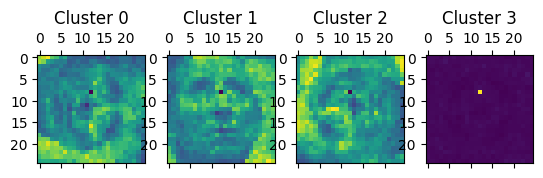

In [56]:
task_7_labels_km_2 = kmeans_7_2.predict(task_7_pca)

task_7_km_2_orientations = sort_to_clusters(task_7_matrix, task_7_labels_km_2)

task_7_subplot, task_7_axes = plt.subplots(1, 4)

for i in range(4):
    task_7_axes[i].matshow(
        np.reshape(average_img(task_7_km_2_orientations[i]), (25, 25))
    )
    task_7_axes[i].set_title(f"Cluster {i}")

In [57]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=4,
    covariance_type="diag",
    n_init=1,  # reduce execution time of notebook. this was initially 10.
    means_init=task_7_label_coords,
)

In [58]:
task_7_gmm_labels = gmm.fit_predict(task_7_pca)

task_7_gmm_orientations = sort_to_clusters(task_7_matrix, task_7_gmm_labels)

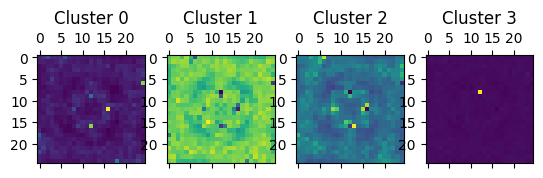

In [59]:
task_7_subplot, task_7_axes = plt.subplots(1, 4)

for i in range(4):
    task_7_axes[i].matshow(
        np.reshape(average_img(task_7_gmm_orientations[i]), (25, 25))
    )
    task_7_axes[i].set_title(f"Cluster {i}")

With cosine distance


In [60]:
kmeans_7_3 = KMeans(
    4, n_init=1, init="k-means++"
)  # reduce execution time of notebook. n_init=20.

unit_task_7_matrix = task_7_matrix / np.linalg.norm(task_7_matrix)

In [61]:
task_7_kmeans_cosine_labels = kmeans_7_3.fit_predict(unit_task_7_matrix)

task_7_kmeans_cosine_orientations = sort_to_clusters(
    task_7_matrix, task_7_kmeans_cosine_labels
)

In [62]:
(
    task_7_kmeans_cosine_orientations[0].shape,
    task_7_kmeans_cosine_orientations[1].shape,
    task_7_kmeans_cosine_orientations[2].shape,
    task_7_kmeans_cosine_orientations[3].shape,
)

((4447, 625), (59796, 625), (22746, 625), (13011, 625))

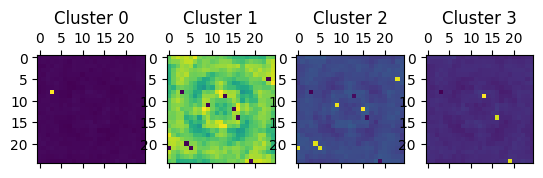

In [63]:
task_7_subplot, task_7_axes = plt.subplots(1, 4)

for i in range(4):
    task_7_axes[i].matshow(
        np.reshape(average_img(task_7_kmeans_cosine_orientations[i]), (25, 25))
    )
    task_7_axes[i].set_title(f"Cluster {i}")

Bisecting K-Means


In [70]:
from sklearn.cluster import BisectingKMeans

In [71]:
b_kmeans = BisectingKMeans(
    n_clusters=4, n_init=10, bisecting_strategy="largest_cluster"
)

task_7_bkmeans_labels = b_kmeans.fit_predict(task_7_matrix)

task_7_bkmeans_orientations = sort_to_clusters(task_7_matrix, task_7_bkmeans_labels)

In [73]:
(
    task_7_bkmeans_orientations[0].shape,
    task_7_bkmeans_orientations[1].shape,
    task_7_bkmeans_orientations[2].shape,
    task_7_bkmeans_orientations[3].shape,
)

((23497, 625), (61877, 625), (10663, 625), (3963, 625))

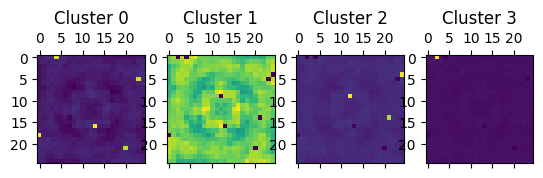

In [72]:
task_7_subplot, task_7_axes = plt.subplots(1, 4)

for i in range(4):
    task_7_axes[i].matshow(
        np.reshape(average_img(task_7_bkmeans_orientations[i]), (25, 25))
    )
    task_7_axes[i].set_title(f"Cluster {i}")